<a href="https://colab.research.google.com/github/Sohamch03/Sohamch03/blob/main/netflixdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Try using the Python engine instead of the C engine
try:
    df = pd.read_csv('/content/mymoviedb.csv', engine='python')
    df.head()
except pd.errors.ParserError:
    # If the Python engine also fails, try specifying the encoding
    df = pd.read_csv('/content/mymoviedb.csv', engine='python', encoding='utf-8')
    df.head()
    # Consider other encodings like 'latin-1', 'iso-8859-1' if 'utf-8' doesn't work

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


from matplotlib import pyplot as plt
_df_0['Popularity'].plot(kind='hist', bins=20, title='Popularity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Popularity'].plot(kind='line', figsize=(8, 4), title='Popularity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:


# Assuming df is your DataFrame

# Attempt to convert to datetime, handling errors by coercing invalid values to NaT (Not a Time)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


print(df['Release_Date'].head())

0   2021-12-15
1   2022-03-01
2   2022-02-25
3   2021-11-24
4   2021-12-22
Name: Release_Date, dtype: datetime64[ns]


In [ ]:
df['Release_Date'] = df['Release_Date'].dt.year
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Data
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022.0
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021.0
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021.0


In [ ]:
cols = ['Overview','Original_Language','Poster_Url'];
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Release_Data'],
      dtype='object')

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Data
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021.0
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022.0
2,2022.0,No Exit,2618.087,122,6.3,Thriller,2022.0
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021.0
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021.0


In [ ]:
def catigorize_column(df, col, label):
  # Convert the column to numeric if it's not already
  df[col] = pd.to_numeric(df[col], errors='coerce')

  # Now describe will work correctly
  desc = df[col].describe()

  # Check if the expected keys are present in the describe output
  if 'min' in desc and '25%' in desc and '50%' in desc and '75%' in desc and 'max' in desc:
    edges = [desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']]
    df[col] = pd.cut(df[col], bins=edges, labels=label, duplicates='drop', include_lowest=True)
  else:
    # Handle the case where the expected keys are not found (e.g., for object type columns)
    print(f"Warning: Column '{col}' does not have the expected descriptive statistics. Skipping categorization.")

  return df

In [ ]:
labels = ['not_popular', 'below_avg','average','popular']
catigorize_column(df,'Vote_Average', labels) # Changed catigorize_col to catigorize_column
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Data
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021.0
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022.0
2,2022.0,No Exit,2618.087,122,below_avg,Thriller,2022.0
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021.0
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021.0


In [ ]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2567
popular,2450
average,2411
below_avg,2398


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Data,0


In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Data
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021.0
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021.0
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021.0
3,2022.0,The Batman,3827.658,1151,popular,Crime,2022.0
4,2022.0,The Batman,3827.658,1151,popular,Mystery,2022.0


In [ ]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.nunique()

,0
Release_Date,102
Title,9512
Popularity,8159
Vote_Count,3266
Vote_Average,4
Genre,19
Release_Data,102


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Data
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021.0
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021.0
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021.0
3,2022.0,The Batman,3827.658,1151,popular,Crime,2022.0
4,2022.0,The Batman,3827.658,1151,popular,Mystery,2022.0


In [ ]:
sns.set_style('whitegrid')
df['Genre'].describe()

,Genre
count,25792
unique,19
top,Drama
freq,3744


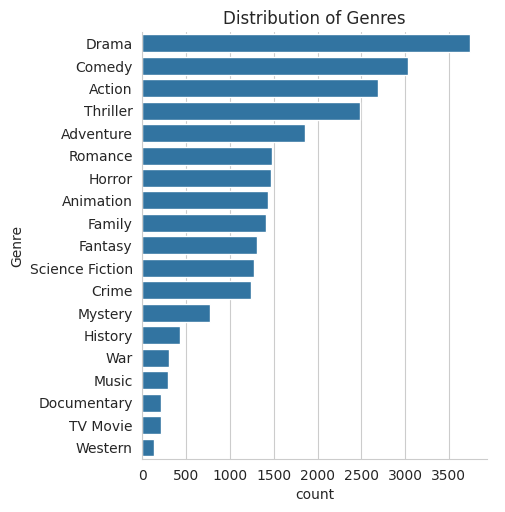

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module

# ... your existing code ...

sns.catplot(y = 'Genre', data = df, kind = 'count', order= df['Genre'].value_counts().index)
plt.title('Distribution of Genres') # Now plt refers to matplotlib.pyplot
plt.show()

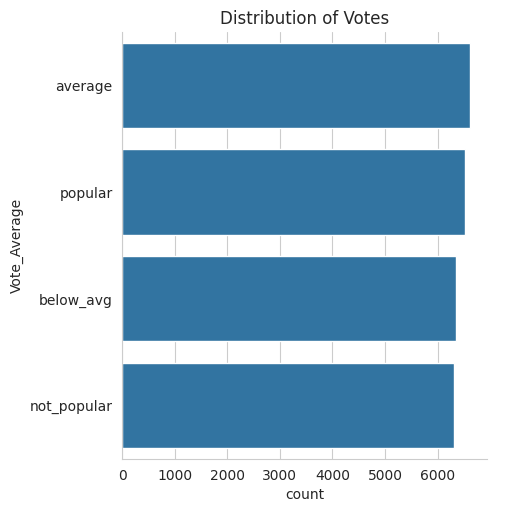

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module

# ... your existing code ...

sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order= df['Vote_Average'].value_counts().index)
plt.title('Distribution of Votes') # Now plt refers to matplotlib.pyplot
plt.show()

In [ ]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Data
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021.0
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021.0


In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Data
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021.0
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021.0
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021.0


In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Data
25786,2021.0,The United States vs. Billie Holiday,13.354,152,average,Music,2021.0
25787,2021.0,The United States vs. Billie Holiday,13.354,152,average,Drama,2021.0
25788,2021.0,The United States vs. Billie Holiday,13.354,152,average,History,2021.0
25789,1984.0,Threads,13.354,186,popular,War,1984.0
25790,1984.0,Threads,13.354,186,popular,Drama,1984.0
25791,1984.0,Threads,13.354,186,popular,Science Fiction,1984.0


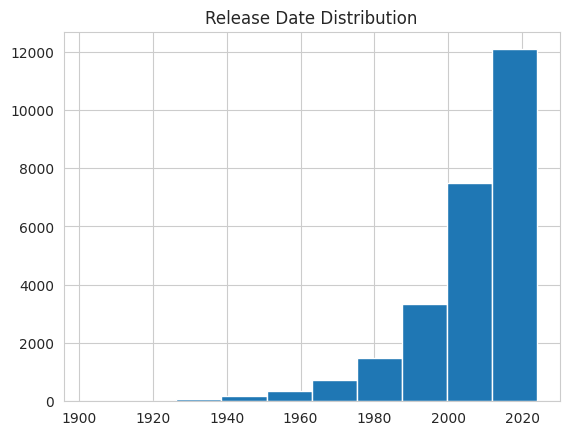

In [ ]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()